# Analyzing Loan Data from Lending Club

[Link](https://www.lendingclub.com/info/download-data.action) to data sets.

In [108]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns",100)

In [114]:
df = pd.read_csv('/home/pybokeh/Downloads/LoanStats3c.csv', skiprows=1)

/home/pybokeh/miniconda3/envs/jupyter/lib/python3.4/site-packages/pandas/io/parsers.py:1159: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [118]:
df = pd.read_csv('/home/pybokeh/Downloads/LoanStats3c.csv', skiprows=1, dtype={0:str, 19:str})

In [119]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,is_inc_v,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code
0,36805548,39558264,10400,10400,10400,36 months,6.99%,321.08,A,A3,Truck Driver Delivery Personel,8 years,MORTGAGE,58000,Not Verified,Dec-2014,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,937xx,CA,14.92,0,Sep-1989,2,42,NaN,17,0,6133,31.6%,36,w,10139.50,10139.50,310.98,310.98,260.50,50.48,0,0,0,Feb-2015,321.08,Feb-2015,Feb-2015,0,59,1
1,38098114,40860827,15000,15000,15000,60 months,12.39%,336.64,C,C1,MANAGEMENT,10+ years,RENT,78000,Source Verified,Dec-2014,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,235xx,VA,12.03,0,Aug-1994,0,NaN,NaN,6,0,138008,29%,17,w,14818.24,14818.24,310.83,310.83,181.76,129.06,0,0,0,Feb-2015,336.64,Feb-2015,Feb-2015,0,NaN,1
2,37612354,40375473,12800,12800,12800,60 months,17.14%,319.08,D,D4,Senior Sales Professional,10+ years,MORTGAGE,125000,Verified,Dec-2014,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,car,Car financing,953xx,CA,8.31,1,Oct-2000,0,17,NaN,8,0,5753,100.9%,13,w,12663.75,12663.75,288.61,288.61,136.25,152.36,0,0,0,Feb-2015,319.08,Feb-2015,Feb-2015,0,36,1
3,37662224,40425321,7650,7650,7650,36 months,13.66%,260.20,C,C3,Technical Specialist,< 1 year,RENT,50000,Source Verified,Dec-2014,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,850xx,AZ,34.81,0,Aug-2002,1,NaN,NaN,11,0,16822,91.9%,20,f,7476.88,7476.88,245.69,245.69,173.12,72.57,0,0,0,Feb-2015,260.20,Feb-2015,Feb-2015,0,NaN,1
4,37822187,40585251,9600,9600,9600,36 months,13.66%,326.53,C,C3,Admin Specialist,10+ years,RENT,69000,Source Verified,Dec-2014,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,077xx,NJ,25.81,0,Nov-1992,0,NaN,NaN,12,0,16388,59.4%,44,f,9382.75,9382.75,308.32,308.32,217.25,91.07,0,0,0,Feb-2015,326.53,Feb-2015,Feb-2015,0,NaN,1


In [117]:
df.dtypes

id                              object
member_id                      float64
loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                            object
int_rate                        object
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
is_inc_v                        object
issue_d                         object
loan_status                     object
pymnt_plan                      object
url                             object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs              

In [74]:
df2 = df[['emp_title','emp_length']]

In [75]:
df2.dtypes

emp_title     object
emp_length    object
dtype: object

In [76]:
df2['emp_length'].value_counts()

10+ years    79505
2 years      20487
3 years      18267
< 1 year     17982
1 year       14593
4 years      13528
7 years      13099
5 years      13051
n/a          12019
8 years      11853
6 years      11821
9 years       9424
dtype: int64

In [77]:
df[df['emp_length']=='n/a'].head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,is_inc_v,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code
18,36109709,38821388,2000,2000,2000,36 months,12.99%,67.38,C,C2,NaN,n/a,RENT,21312.0,Verified,Dec-2014,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,medical,Medical expenses,463xx,IN,5.46,0,Nov-1998,1,NaN,NaN,14,0,744,1.9%,20,w,1954.27,1954.27,63.77,63.77,45.73,18.04,0,0,0,Feb-2015,67.38,Feb-2015,Feb-2015,0,NaN,1
104,37691982,40465056,3000,3000,3000,36 months,14.31%,102.99,C,C4,NaN,n/a,MORTGAGE,133000.0,Verified,Dec-2014,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,other,Other,922xx,CA,14.13,0,Sep-1985,3,26,NaN,10,0,25133,81.3%,32,f,2932.78,2932.78,99.41,99.41,67.22,32.20,0,0,0,Feb-2015,102.99,Feb-2015,Feb-2015,0,26,1
125,37841841,40604912,5500,5500,5500,36 months,10.49%,178.74,B,B3,NaN,n/a,RENT,16344.0,Verified,Dec-2014,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,331xx,FL,16.27,0,Sep-1987,0,NaN,NaN,6,0,9136,94.2%,30,f,5369.34,5369.34,173.93,173.93,130.66,43.27,0,0,0,Feb-2015,178.74,Feb-2015,Feb-2015,0,NaN,1
161,37761758,40524818,5000,5000,5000,36 months,16.49%,177.00,D,D3,NaN,n/a,RENT,18868.8,Source Verified,Dec-2014,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,781xx,TX,26.66,0,Dec-1999,2,NaN,NaN,9,0,7487,65.7%,13,f,4891.71,4891.71,170.13,170.13,108.29,61.84,0,0,0,Feb-2015,177.00,Mar-2015,Feb-2015,0,NaN,1
207,37691828,40464881,10000,10000,10000,60 months,19.24%,260.73,E,E2,NaN,n/a,MORTGAGE,50000.0,Source Verified,Dec-2014,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,462xx,IN,33.77,0,Feb-1995,3,NaN,NaN,13,0,26997,75.6%,15,w,9899.60,9899.60,250.04,250.04,100.40,149.64,0,0,0,Feb-2015,260.73,Feb-2015,Feb-2015,0,NaN,1


In [125]:
df['I_rate'] = df['int_rate'].str.replace('%','').astype(np.float64)

In [126]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,is_inc_v,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,I_rate
0,36805548,39558264,10400,10400,10400,36 months,6.99%,321.08,A,A3,Truck Driver Delivery Personel,8 years,MORTGAGE,58000,Not Verified,Dec-2014,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,937xx,CA,14.92,0,Sep-1989,2,42,NaN,17,0,6133,31.6%,36,w,10139.50,10139.50,310.98,310.98,260.50,50.48,0,0,0,Feb-2015,321.08,Feb-2015,Feb-2015,0,59,1,6.99
1,38098114,40860827,15000,15000,15000,60 months,12.39%,336.64,C,C1,MANAGEMENT,10+ years,RENT,78000,Source Verified,Dec-2014,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,235xx,VA,12.03,0,Aug-1994,0,NaN,NaN,6,0,138008,29%,17,w,14818.24,14818.24,310.83,310.83,181.76,129.06,0,0,0,Feb-2015,336.64,Feb-2015,Feb-2015,0,NaN,1,12.39
2,37612354,40375473,12800,12800,12800,60 months,17.14%,319.08,D,D4,Senior Sales Professional,10+ years,MORTGAGE,125000,Verified,Dec-2014,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,car,Car financing,953xx,CA,8.31,1,Oct-2000,0,17,NaN,8,0,5753,100.9%,13,w,12663.75,12663.75,288.61,288.61,136.25,152.36,0,0,0,Feb-2015,319.08,Feb-2015,Feb-2015,0,36,1,17.14
3,37662224,40425321,7650,7650,7650,36 months,13.66%,260.20,C,C3,Technical Specialist,< 1 year,RENT,50000,Source Verified,Dec-2014,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,850xx,AZ,34.81,0,Aug-2002,1,NaN,NaN,11,0,16822,91.9%,20,f,7476.88,7476.88,245.69,245.69,173.12,72.57,0,0,0,Feb-2015,260.20,Feb-2015,Feb-2015,0,NaN,1,13.66
4,37822187,40585251,9600,9600,9600,36 months,13.66%,326.53,C,C3,Admin Specialist,10+ years,RENT,69000,Source Verified,Dec-2014,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,077xx,NJ,25.81,0,Nov-1992,0,NaN,NaN,12,0,16388,59.4%,44,f,9382.75,9382.75,308.32,308.32,217.25,91.07,0,0,0,Feb-2015,326.53,Feb-2015,Feb-2015,0,NaN,1,13.66


In [127]:
df['I_rate'].describe()

count    235629.000000
mean         13.772569
std           4.324842
min           6.000000
25%          10.990000
50%          13.650000
75%          16.290000
max          26.060000
Name: I_rate, dtype: float64

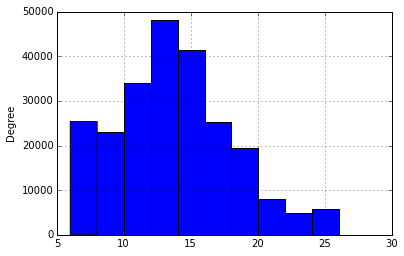

In [101]:
df['I_rate'].plot(kind='hist')
plt.show()

In [123]:
df['revol_bal'].describe()

count     235629.000000
mean       16508.089289
std        21462.890835
min            0.000000
25%         6336.000000
50%        11686.000000
75%        20528.000000
max      2560703.000000
Name: revol_bal, dtype: float64

In [109]:
df['I_rate'].describe()

count    235629.000000
mean         13.772569
std           4.324842
min           6.000000
25%          10.990000
50%          13.650000
75%          16.290000
max          26.060000
Name: I_rate, dtype: float64

In [21]:
df['purpose'].value_counts()

debt_consolidation    143006
credit_card            55522
home_improvement       13045
other                  10371
major_purchase          3858
medical                 2331
small_business          2277
car                     1832
moving                  1328
vacation                1178
house                    750
renewable_energy         123
wedding                    8
dtype: int64

In [105]:
perc = df['purpose'].value_counts() / len(df) * 100

In [106]:
perc

debt_consolidation    60.690656
credit_card           23.563114
home_improvement       5.536199
other                  4.401373
major_purchase         1.637306
medical                0.989259
small_business         0.966341
car                    0.777487
moving                 0.563593
vacation               0.499934
house                  0.318294
renewable_energy       0.052200
wedding                0.003395
dtype: float64

In [107]:
len(df)

235631